# Tutorial of network dynamics - BioModels
The network state-transition-graph (STG), controlled STG (C-STG) and controlled atttractor graph (CAG) for biological relevant boolean network models

In [1]:
import graphviz
import math
#
from cana.datasets.bio import THALIANA #, DROSOPHILA, BUDDING_YEAST

In [2]:
N = THALIANA()
print(N)

<BNetwork(name='Arabidopsis thaliana', N=15, Nodes=['AP3', 'UFO', 'FUL', 'FT', 'AP1', 'EMF1', 'LFY', 'AP2', 'WUS', 'AG', 'LUG', 'CLF', 'TFL1', 'PI', 'SEP'])>


In [3]:
STG = N.state_transition_graph()
attractors = N.attractors(mode='stg')
#
print(STG)
print(attractors)
print('Nodes: %d | Edges: %d' % (len(STG.nodes()) , len(STG.edges()) ))

DiGraph named 'STG: Arabidopsis thaliana' with 8192 nodes and 8192 edges
[[1643], [865], [132], [148], [7787], [7011], [2180], [2196], [5739], [4963]]
Nodes: 8192 | Edges: 8192


In [4]:
DNnames = ['UFO','LUG','CLF','SEP','TFL1']
DNid = [i for i,n in enumerate(N.nodes) if n.name in DNnames]

# Note: CANA will issue a warning for the constant input variables LUG and CLF as these have no inputs
CSTG = N.controlled_state_transition_graph(driver_nodes=DNid)
print(CSTG)
print('Nodes: {:d} | Edges: {:d}'.format(len(CSTG.nodes()) , len(CSTG.edges()) ))

/data/siyer/CANA/cana/boolean_network.py:1065: UserWarning: Cannot control a constant variable 'LUG'! Skipping
  warnings.warn(
/data/siyer/CANA/cana/boolean_network.py:1065: UserWarning: Cannot control a constant variable 'CLF'! Skipping
  warnings.warn(


DiGraph named 'C-STG: Arabidopsis thaliana (UFO,LUG,CLF,TFL1,SEP)' with 8192 nodes and 73701 edges
Nodes: 8192 | Edges: 73701


In [5]:
CAG = N.controlled_attractor_graph(DNid)
print(CAG)
print('Nodes: {:d} | Edges: {:d}'.format(len(CAG.nodes()) , len(CAG.edges()) ))

DiGraph named 'CAG: C-STG: Arabidopsis thaliana Att(UFO,LUG,CLF,TFL1,SEP)' with 10 nodes and 37 edges
Nodes: 10 | Edges: 37


/data/siyer/CANA/cana/boolean_network.py:1216: UserWarning: Cannot control a constant variable 'LUG'! Skipping
  warnings.warn(
/data/siyer/CANA/cana/boolean_network.py:1216: UserWarning: Cannot control a constant variable 'CLF'! Skipping
  warnings.warn(


In [6]:
# Node Position for each one of the models
att = {}
    
# Calculates Node position in a circle. Used to plot nodes always in the same position.
for deg,name in zip(range(0,360,30), ['AG', 'AP3', 'PI', 'AP2', 'TFL1', 'FUL', 'AP1', 'FT', 'EMF1', 'LFY', 'SEP', 'WUS']):
    r = 120
    x, y = r*math.cos(math.radians(deg)), r*math.sin(math.radians(deg))
    att[name] = {'x':x,'y':y}
# Nodes not on the circle. Manually position them = UFO, LUG, CLF
for name,(x,y) in zip(['UFO','LUG','CLF'], [(160.,90.),(180.,30.),(180.,-30.)]):
    att[name] = {'x':x,'y':y}

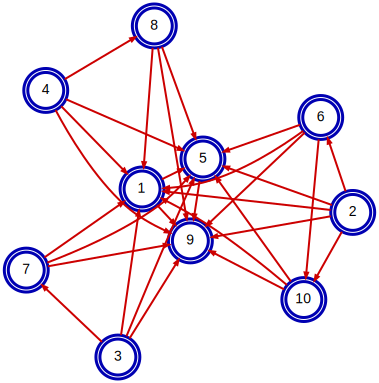

In [7]:
# Draw the Controlled Attractor Graph
S = graphviz.Digraph(name='Control State Transition Graph', engine='neato')
S.attr('graph', concentrate='true', simplify='false', overlap='false',splines='true')
S.attr('node', shape='doublecircle', fixedsize='true', width='0.5', style='filled', penwidth='3', fontname='Helvetica', fontcolor='black',fontsize='14')
S.attr('edge', arrowhead='normal', style='solid', arrowsize='.5')

for node,d in CAG.nodes(data=True):
    if node in attractors:
        fillcolor = 'gray'
    else:
        xy = 'false'
        fillcolor = 'white'
    S.node(name=str(node), label=str(node+1), fillcolor=fillcolor, color='#0000b2')

for s, t, d in CAG.edges(data=True):
    if (s,t) not in att:
        color='#cc0000'
    else:
        color='gray'
    S.edge(str(s),str(t), weight='1', color=color ,len='1.5', penwidth='2.')

# Display
display(S)

In [8]:
Nsg = N.structural_graph()

In [9]:
# Draw a Specific Attractor Configuration
n = 5 # [3, 5]
configuration = CAG.nodes[n]['label']

S = graphviz.Digraph(name='Structural Graph', engine='neato')
S.attr('graph', concentrate='false', simplify='false', overlap='false',splines='true')
S.attr('node', shape='circle', fixedsize='true', width='.5', style='filled', penwidth='4', fontname='Helvetica', fontsize='12')
S.attr('edge', arrowhead='normal', arrowsize='.5', color='#545454')

for state,(node,d) in zip(configuration, Nsg.nodes(data=True)):
    if d['label'] in att:
        natt = att[d['label']]
        if 'x' in natt or 'y' in natt:
            x,y = natt['x'] , natt['y']
            xy = '%.2f,%.2f!' % (x/72,y/72)
    else:
        xy = 'false'
    if node in DNid:
        color = '#ffa500'
    else:
        color = 'gray'
    if state=='1':
        fontcolor ='white'
        fillcolor = 'black'
    else:
        fontcolor ='black'
        fillcolor = 'white'
    S.node(name=str(node), label=d['label'], pos=xy, color=color, fillcolor=fillcolor, fontcolor=fontcolor)

max_penwidth = 2.
for s,t,d in Nsg.edges(data=True):
    weight = '%d' % (d['weight']*100)
    penwidth_scaled = '%.2f' % ( (d['weight']/1)*max_penwidth )
    S.edge(str(s),str(t), weight=weight, penwidth=penwidth_scaled, )

## Display
display(S)

free(): invalid next size (normal)


CalledProcessError: Command '[PosixPath('dot'), '-Kneato', '-Tsvg']' died with <Signals.SIGABRT: 6>. [stderr: 'free(): invalid next size (normal)\n']

In [10]:
# Calculate Effective Graph
threshold = 0.00
Neg = N.effective_graph(threshold=threshold)

In [11]:
# Draw a Specific Attractor Configuration
n = 3 # [3, 5]
configuration = CAG.nodes[n]['label']
configuration = CAG.nodes[n]['label']

S = graphviz.Digraph(name='Structural Graph', engine='neato')
S.attr('graph', concentrate='false', simplify='false', overlap='false',splines='true')
S.attr('node', shape='circle', fixedsize='true', width='.5', style='filled', penwidth='4', fontname='Helvetica', fontsize='12')
S.attr('edge', arrowhead='normal', arrowsize='.5', color='#545454')

for state,(node,d) in zip(configuration, Neg.nodes(data=True)):
    if d['label'] in att:
        natt = att[d['label']]
        if 'x' in natt or 'y' in natt:
            x,y = natt['x'] , natt['y']
            xy = '%.2f,%.2f!' % (x/72,y/72)
    else:
        xy = 'false'
    if node in DNid:
        color = '#ffa500'
    else:
        color = 'gray'
    if state=='1':
        fontcolor ='white'
        fillcolor = 'black'
    else:
        fontcolor ='black'
        fillcolor = 'white'
    S.node(name=str(node), label=d['label'], pos=xy, color=color, fillcolor=fillcolor, fontcolor=fontcolor)

max_penwidth = 2.
for s,t,d in Neg.edges(data=True):
    weight = '%d' % (d['weight']*100)
    penwidth_scaled = '%.2f' % ( (d['weight']/1)*max_penwidth )
    S.edge(str(s),str(t), weight=weight, penwidth=penwidth_scaled, )
# Display
display(S)

double free or corruption (!prev)


CalledProcessError: Command '[PosixPath('dot'), '-Kneato', '-Tsvg']' died with <Signals.SIGABRT: 6>. [stderr: 'double free or corruption (!prev)\n']